# Dogecoin Crypto Currancy Analysis

**Description:** This program analysis Dogecoin 

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [16]:
df = pd.read_excel('C:\\Users\\User\\Documents\\Cursos de ML\\computer science\\dodge coin\\data\\crypto_data.xlsx', sheet_name='data')

In [17]:
df.head(5)

,Date,BTC,DOGE,ETH,LTC
0,2016-01-01,434.334015,0.000154,206062,3.50898
1,2016-01-02,433.437988,0.000151,255504,3.50216
2,2016-01-03,430.010986,0.000146,407632,3.48307
3,2016-01-04,433.091003,0.000144,346245,3.49539
4,2016-01-05,431.959991,0.000137,219833,3.46967


In [18]:
df.shape

(366, 5)

In [19]:
df.isnull().sum()

Date    0
BTC     0
DOGE    0
ETH     0
LTC     0
dtype: int64

In [20]:
df.dtypes

Date    datetime64[ns]
BTC            float64
DOGE           float64
ETH              int64
LTC            float64
dtype: object

In [21]:
#set column date to index

df.set_index('Date', inplace =True)

In [22]:
df.head(5)

,BTC,DOGE,ETH,LTC
Date,,,,
2016-01-01,434.334015,0.000154,206062,3.50898
2016-01-02,433.437988,0.000151,255504,3.50216
2016-01-03,430.010986,0.000146,407632,3.48307
2016-01-04,433.091003,0.000144,346245,3.49539
2016-01-05,431.959991,0.000137,219833,3.46967


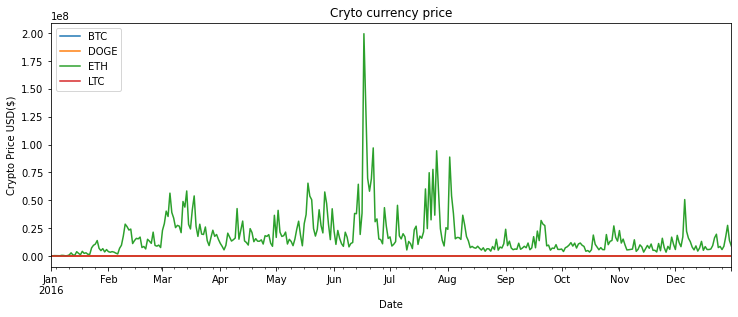

In [31]:
#Grah
df.plot(figsize= (12.2,4.5))
plt.title('Cryto currency price')
plt.ylabel('Crypto Price USD($)')
plt.legend(loc = 'upper left')
plt.show()

In [28]:
df.describe()

,BTC,DOGE,ETH,LTC
count,366.000000,366.000000,3.660000e+02,366.000000
mean,568.492407,0.000235,1.797756e+07,3.788696
std,139.255734,0.000036,1.924913e+07,0.488344
min,364.330994,0.000135,2.060620e+05,2.996780
25%,432.206757,0.000221,7.220728e+06,3.400917
50%,582.556000,0.000229,1.290770e+07,3.815570
75%,664.227020,0.000243,2.167515e+07,3.971830
max,975.921021,0.000455,1.994080e+08,5.660790


### Scale data

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
minmax = MinMaxScaler(feature_range=(0,100))

In [34]:
scale = minmax.fit_transform(df)

In [35]:
scale

array([[1.14460698e+01, 6.19454278e+00, 0.00000000e+00, 1.92266586e+01],
       [1.12995621e+01, 5.05615294e+00, 2.48200397e-02, 1.89706549e+01],
       [1.07392191e+01, 3.50127614e+00, 1.01188775e-01, 1.82540595e+01],
       ...,
       [9.96036542e+01, 2.93089769e+01, 1.37236305e+01, 5.85095423e+01],
       [9.75992015e+01, 2.90219609e+01, 6.87936982e+00, 5.23173769e+01],
       [9.80087904e+01, 2.77438084e+01, 4.44811837e+00, 4.98688166e+01]])

In [37]:
#convert scale into df
df_scale = pd.DataFrame(scale, columns= df.columns)
df_scale.head()
#set data index
df_scale.set_index(pd.DatetimeIndex(df.index), inplace=True)

In [39]:
df_scale.head()

,BTC,DOGE,ETH,LTC
Date,,,,
2016-01-01,11.446070,6.194543,0.000000,19.226659
2016-01-02,11.299562,5.056153,0.024820,18.970655
2016-01-03,10.739219,3.501276,0.101189,18.254059
2016-01-04,11.242827,2.841764,0.070372,18.716522
2016-01-05,11.057897,0.802707,0.006913,17.751064


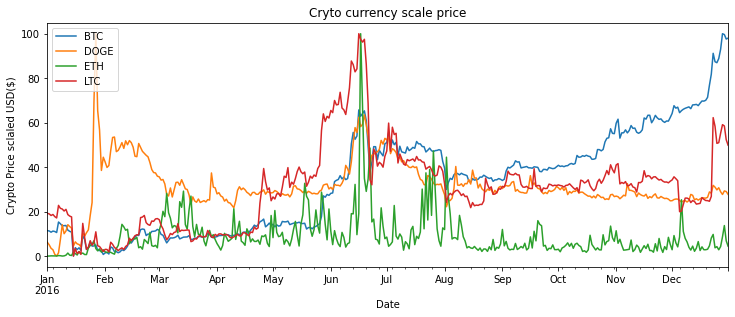

In [40]:
df_scale.plot(figsize= (12.2,4.5))
plt.title('Cryto currency scale price')
plt.ylabel('Crypto Price sclaled USD($)')
plt.legend(loc = 'upper left')
plt.show()

### Daily Simple Return

In [42]:
DSR = df.pct_change(1)
DSR.head()

,BTC,DOGE,ETH,LTC
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,-0.002063,-0.023635,0.239937,-0.001944
2016-01-03,-0.007907,-0.033063,0.595404,-0.005451
2016-01-04,0.007163,-0.014503,-0.150594,0.003537
2016-01-05,-0.002611,-0.045501,-0.365094,-0.007358


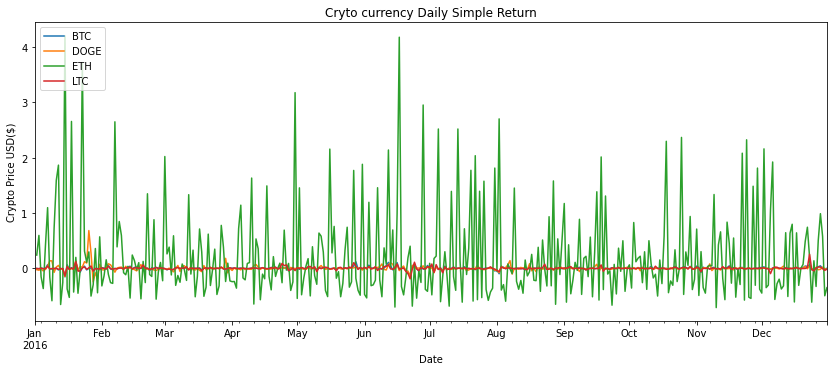

In [45]:
DSR.plot(figsize= (14.2,5.5))
plt.title('Cryto currency Daily Simple Return')
plt.ylabel('Crypto Price USD($)')
plt.legend(loc = 'upper left')
plt.show()

### volativity

In [47]:
DSR.std()

BTC     0.025168
DOGE    0.054536
ETH     0.826324
LTC     0.030031
dtype: float64

#### Narrative
+ the most volativity: ETH and DOGE

In [48]:
DSR.mean()

BTC     0.002504
DOGE    0.002301
ETH     0.212482
LTC     0.001017
dtype: float64

### Correlation

In [50]:
DSR.corr()

,BTC,DOGE,ETH,LTC
BTC,1.000000,0.274518,-0.113461,0.760293
DOGE,0.274518,1.000000,-0.062919,0.278136
ETH,-0.113461,-0.062919,1.000000,-0.079637
LTC,0.760293,0.278136,-0.079637,1.000000


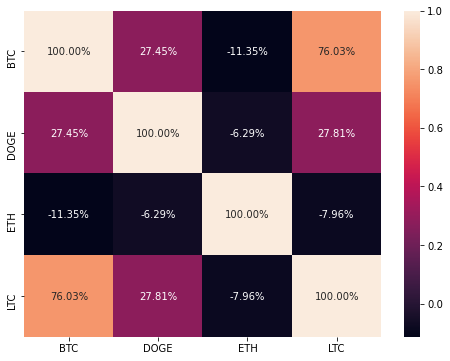

In [59]:
plt.figure(figsize= (8, 6))
sns.heatmap(DSR.corr(), annot=True, fmt='.2%')
plt.show()

### Daily cumulative simple returns

In [61]:
DCSR = (DSR+1).cumprod()

In [62]:
DCSR

,BTC,DOGE,ETH,LTC
Date,,,,
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,0.997937,0.976365,1.239937,0.998056
2016-01-03,0.990047,0.944084,1.978201,0.992616
2016-01-04,0.997138,0.930391,1.680295,0.996127
2016-01-05,0.994534,0.888058,1.066829,0.988797
...,...,...,...,...
2016-12-27,2.148572,1.471760,42.601790,1.273703
2016-12-28,2.246937,1.446344,84.699265,1.302758
2016-12-29,2.241356,1.479889,133.667537,1.298235


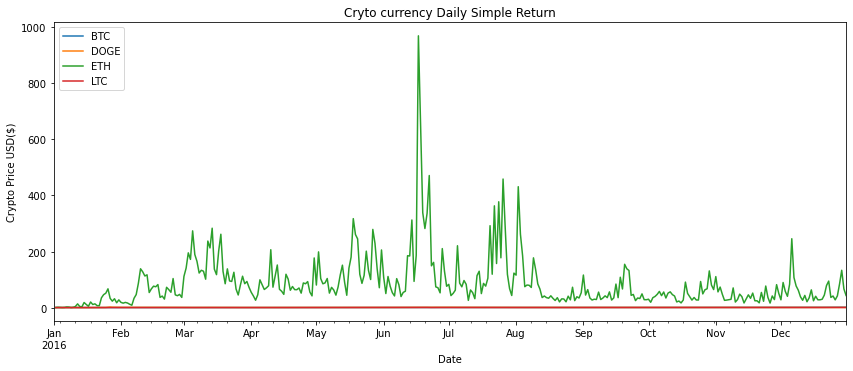

In [63]:
DCSR.plot(figsize= (14.2,5.5))
plt.title('Cryto currency Daily Simple Return')
plt.ylabel('Crypto Price USD($)')
plt.legend(loc = 'upper left')
plt.show()